## Spotify Listening Data Analysis

Author: Pavel Kukushkin

Dataset: export of listening data from 3 Spotify accounts, combined in a .csv file through various data transformations

In [1]:
import pandas as pd

In [2]:
spotify = pd.read_csv('https://raw.githubusercontent.com/pvlsson/spotify-history/master/data/pvl_spotify_history.csv', parse_dates=['listen_date'])

In [3]:
spotify.head()

,id,listen_date,username_hash,platform_group,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,played_time,track_name
0,1,2019-03-30,b679e03a011213b4dc3fc8db84640a61,Windows,DE,Union,MRD,Sublimation,spotify:track:0FTAtFfdWexQwDDUIV9oRM,clickrow,trackdone,0,0,0,0,00:10:14,MRD - Union
1,2,2019-03-30,b679e03a011213b4dc3fc8db84640a61,Windows,DE,Ball Lightning,The Planetary Defence Side Project,Ball Lightning,spotify:track:0ENjvpFC7Qsn76wLQ3IKTf,trackdone,trackdone,0,0,0,0,00:08:27,The Planetary Defence Side Project - Ball Ligh...
2,3,2019-03-30,b679e03a011213b4dc3fc8db84640a61,Windows,DE,The Party We Could Have,Nathan Micay,The Party We Could Have,spotify:track:4Ub6kLgT87kBzpSj0Jgd8C,trackdone,trackdone,0,0,0,0,00:07:08,Nathan Micay - The Party We Could Have
3,4,2019-03-30,b679e03a011213b4dc3fc8db84640a61,Windows,DE,No Real Perspective,FNP,No Real Perspective,spotify:track:0UR4FNAXarQDN3AiAnA7lY,trackdone,trackdone,0,0,0,0,00:06:38,FNP - No Real Perspective
4,5,2019-03-31,b679e03a011213b4dc3fc8db84640a61,Windows,DE,Chickenwings - Original mix,Maureille,Chicken Tribulations,spotify:track:1XqBnLUpOSuZimbZHhoy02,trackdone,logout,0,0,0,0,00:05:02,Maureille - Chickenwings - Original mix


In [5]:
len(spotify)

31414

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31414 entries, 0 to 31413
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 31414 non-null  int64         
 1   listen_date                        31414 non-null  datetime64[ns]
 2   username_hash                      31414 non-null  object        
 3   platform_group                     31414 non-null  object        
 4   conn_country                       31414 non-null  object        
 5   master_metadata_track_name         27526 non-null  object        
 6   master_metadata_album_artist_name  27526 non-null  object        
 7   master_metadata_album_album_name   27526 non-null  object        
 8   spotify_track_uri                  27526 non-null  object        
 9   reason_start                       31414 non-null  object        
 10  reason_end                        

Looks like all data points were collected while listening to music online with incognito mode switched off.

In [ ]:
spotify.describe()

,id,shuffle,skipped,offline,incognito_mode
count,31414.000000,31414.0,31414.000000,31414.0,31414.0
mean,15707.500000,0.0,0.059846,0.0,0.0
std,9068.585015,0.0,0.237205,0.0,0.0
min,1.000000,0.0,0.000000,0.0,0.0
25%,7854.250000,0.0,0.000000,0.0,0.0
50%,15707.500000,0.0,0.000000,0.0,0.0
75%,23560.750000,0.0,0.000000,0.0,0.0
max,31414.000000,0.0,1.000000,0.0,0.0


Count listen times per track

In [6]:
spotify['track_name'].value_counts()

Glass Animals - Your Love (Déjà Vu)    74
MORGENSHTERN - Cadillac                55
MORGENSHTERN - Новый Мерин             53
Moderat - DOOM HYPE                    53
Luna - Золотые Лепестки                49
                                       ..
Bonobo - 6000 Ft.                       1
Shinedown - Adrenaline                  1
Skillet - Dead Man Walking              1
Skillet - Good to Be Alive              1
Yppah - R. Mullen                       1
Name: track_name, Length: 7659, dtype: int64

Percentage of total: not too telling - the most listened to artist is at 2.36%

In [9]:
spotify['master_metadata_album_artist_name'].value_counts(normalize=True)*100

Luna            2.365037
Moderat         2.154327
MORGENSHTERN    1.998111
HLEB            1.892756
Max Cooper      1.761971
                  ...   
PALASTIC        0.003633
Mat Zo          0.003633
Nuage           0.003633
Tentendo        0.003633
Yppah           0.003633
Name: master_metadata_album_artist_name, Length: 2591, dtype: float64

Now visualize the number of listens per month of year

In [17]:
import sqlite3
import matplotlib.pyplot as plt

In [11]:
# Connect to a temporary SQLite database in memory
conn = sqlite3.connect(':memory:')

In [12]:
spotify.to_sql('spotify_data', conn, index=False)

31414

In [15]:
# Execute the SQL query and store the results in a dataframe
query = """
select strftime('%m', listen_date) as ListenMonth, strftime('%Y', listen_date) as ListenYear, count(ID) as Listens
from spotify_data
group by ListenMonth, ListenYear
"""
df_sql = pd.read_sql_query(query, conn)

In [16]:
# Close the database connection
conn.close()

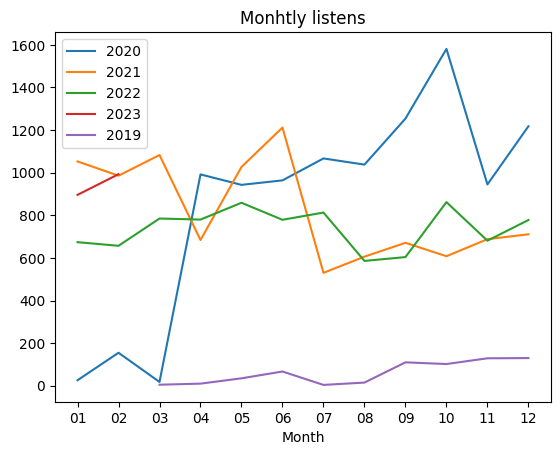

In [21]:
# Create a line chart
for year in df_sql['ListenYear'].unique():
    year_data = df_sql[df_sql['ListenYear'] == year]
    plt.plot(year_data['ListenMonth'], year_data['Listens'], label=str(year))

# Set the chart title and axis labels
plt.title('Monhtly listens')
plt.xlabel('Month')

# Add a legend to the chart
plt.legend()